# 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용한 연봉 예측
- 연봉이 5만달러 이상인지 아닌지

### 컬럼 설명
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

0. 필요한 라이브러리 로딩
1. 필요한 데이터 로딩
2. 데이터 전처리(결측값처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로 생성, 문자->숫자, 상관관계)
4. Feature Engineering(변수 선택, 새로운 특성 생성, 카테고리 변수와 더미 변수화(one-hot encoding))
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. sklearn에서 DecisionTreeClassifier를 불러와서 모델 훈련
8. test 세트를 모델에 넣어서 예측값 생성(pred)
9. accuracy_score(), classification_report()를 이용해서 모델의 성능 확인

## 0. 필요한 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

## 1. 필요한 데이터 로딩

In [2]:
data = pd.read_csv('./data/salary2.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## 2. 데이터 전처리(결측값처리, 이상값 탐지)

### 결측값 처리

In [5]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [6]:
# 5% 이상인 경우는 대체
# 5% 미만인 경우는 대체하거나 행 삭제해도 무방
# 대체로 진행 -> 범주형 데이터이기 때문에 최빈값으로 진행
print(data['workclass'].dtype)
print(data['occupation'].dtype)
print(data['native-country'].dtype)

object
object
object


In [7]:
# workclass 최빈값 대체
print(data['workclass'].value_counts())
print()

na_idx = data[data['workclass'].isna()].index

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64



In [8]:
# 최빈값 확인 및 대체 수행
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])

In [9]:
print(data['workclass'].isna().sum())
print()
data.loc[na_idx]

0



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,Private,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Private,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,Private,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,Private,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,Private,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Private,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,Private,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,Private,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
# occupation 최빈값 대체
print(data['occupation'].value_counts())
print()

na_idx = data[data['occupation'].isna()].index

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64



In [11]:
# 최빈값 확인 및 대체 수행
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])

In [12]:
print(data['occupation'].isna().sum())
print()
data.loc[na_idx]

0



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,<=50K
22,72,Private,7th-8th,4,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
48822,41,Private,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [13]:
# occupation 최빈값 대체
print(data['native-country'].value_counts().head())
print()

na_idx = data[data['native-country'].isna()].index

native-country
United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: count, dtype: int64



In [14]:
# 최빈값 확인 및 대체 수행
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

In [15]:
print(data['native-country'].isna().sum())
print()
data.loc[na_idx]

0



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,United-States,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,United-States,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,United-States,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
48750,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
48773,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,United-States,<=50K
48791,39,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K


In [16]:
# 결측치 존재하는지 확인
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

### 이상값 탐지

In [17]:
data_desc = data.describe()

In [18]:
data_num = data[data_desc.columns]

<Axes: >

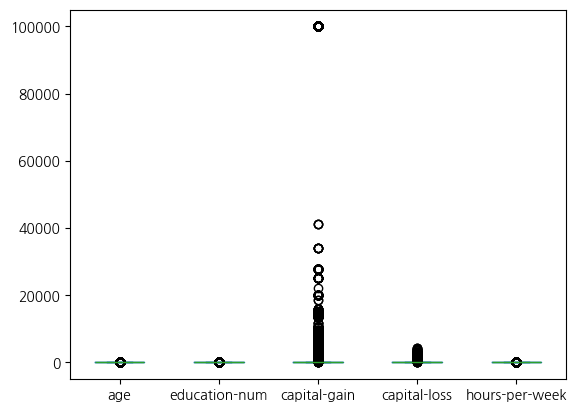

In [19]:
# 박스수염그래프 생성
data_num.plot(kind='box')

In [20]:
data_num.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

[    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731  6097   914  7896
  5556  1409  3781  3942  2538  3887 25124  7443  5721  1173  4687  6612
  6767  2961   991  2036  2936  2050  1111  2228 22040  3432  6360  2009
  1639 18481  2387]


<Axes: >

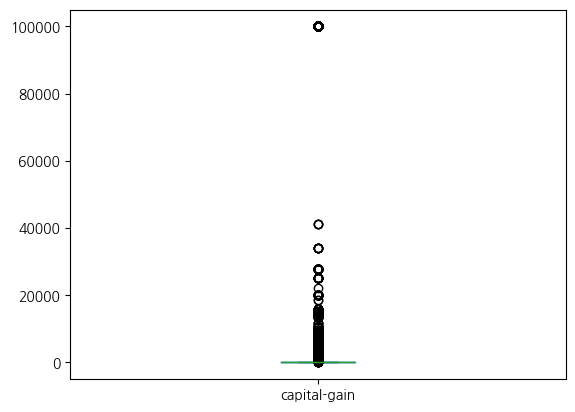

In [21]:
# capital-gain 확인
print(data['capital-gain'].unique())

# 박스 플롯 확인
data['capital-gain'].plot(kind='box')

<Axes: ylabel='Frequency'>

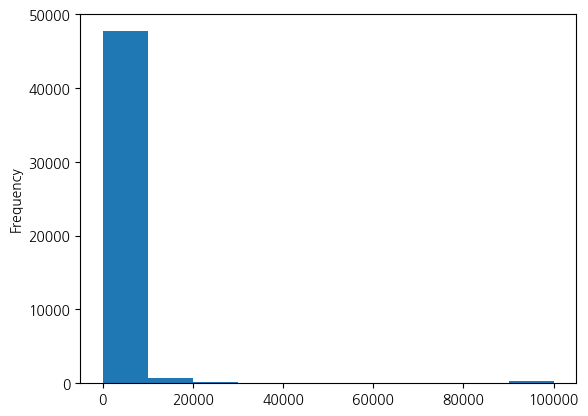

In [22]:
# 히스토그램
data['capital-gain'].plot(kind='hist')

In [23]:
data['capital-gain'] = data['capital-gain'].astype(int)
has_gain = data['capital-gain'][data['capital-gain'] > 0]

In [24]:
has_gain.value_counts()

capital-gain
15024    513
7688     410
7298     364
99999    244
3103     152
        ... 
6612       1
1111       1
22040      1
1639       1
2387       1
Name: count, Length: 122, dtype: int64

<Axes: >

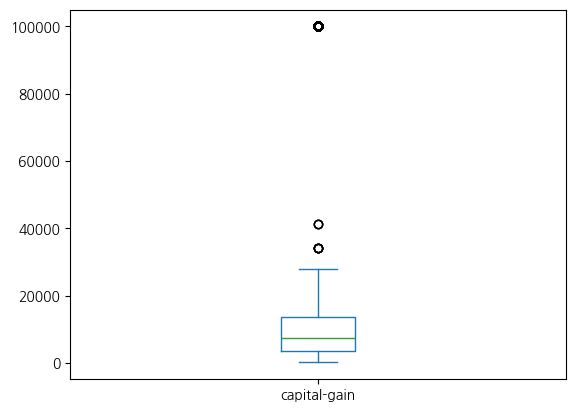

In [25]:
pos = data.loc[data['capital-gain'] > 0, 'capital-gain']
pos_desc = pos.describe()
pos.plot(kind='box')

In [26]:
# 0이 아닌 수를 찾아서 이상치 처리
upper_bound = pos_desc.loc['75%'] + (1.5 * (pos_desc.loc['75%'] - pos_desc.loc['25%']))

# 전체 데이터 중 이상치 처리
outlier = data[data['capital-gain'] > upper_bound]

# 전체 데이터 중 이상치가 차지하는 비율 확인
len(outlier) / len(data) * 100


0.5179968060275991

In [27]:
# 해당 데이터가 차지하는 비율이 1% 미만이라서 제거해도 무방할 거 같음
outlier_idx = data[data['capital-gain'] > upper_bound].index
data = data.drop(outlier_idx).reset_index(drop=True)

In [28]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48584,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48585,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48586,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48587,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
# capial-loss도 동일하게 이상치 처리
loss = data[data['capital-loss'] > 0]
loss

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
52,21,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,1721,24,United-States,<=50K
82,24,Private,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,1876,40,United-States,<=50K
128,41,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K
142,43,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,45,United-States,>50K
153,40,State-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48470,53,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,>50K
48472,18,Private,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,1602,20,United-States,<=50K
48474,61,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,1669,50,United-States,<=50K
48487,36,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K


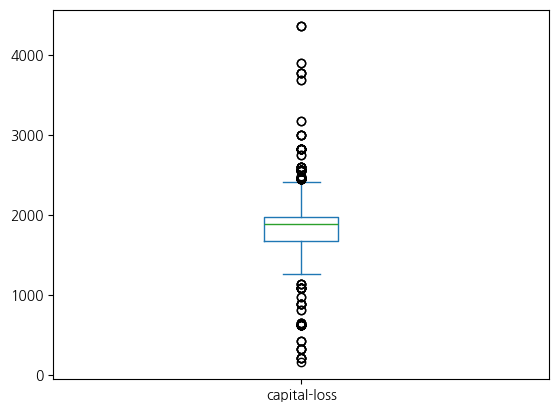

In [30]:
loss['capital-loss'].plot(kind='box')

# 위아래로 이상치가 존재한다는 것을 확인
loss_desc = loss.describe()

In [44]:
# 이상치 판단 기준 설정
upper_bound = loss_desc['capital-loss'].loc['75%'] + (1.5 * (loss_desc['capital-loss'].loc['75%'] - loss_desc['capital-loss'].loc['25%']))
lower_bound = loss_desc['capital-loss'].loc['75%'] - (1.5 * (loss_desc['capital-loss'].loc['75%'] - loss_desc['capital-loss'].loc['25%']))

print(upper_bound)
print(lower_bound)

2434.5
1519.5


In [45]:
outlier= data[(data['capital-loss'] > upper_bound) | (data['capital-loss'] < lower_bound) & (data['capital-loss'] != 0)]

In [46]:
# 전체 데이터셋 중 이상치가 얼마나 차지하는지 확인
len(outlier_loss) / len(data) * 100

0.6688756714482702

In [47]:
outlier_loss_idx = data[(data['capital-loss'] > upper_bound) | (data['capital-loss'] < lower_bound) & (data['capital-loss'] != 0)].index
data = data.drop(outlier_loss_idx).reset_index(drop=True)

In [48]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48259,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48260,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48261,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48262,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: >

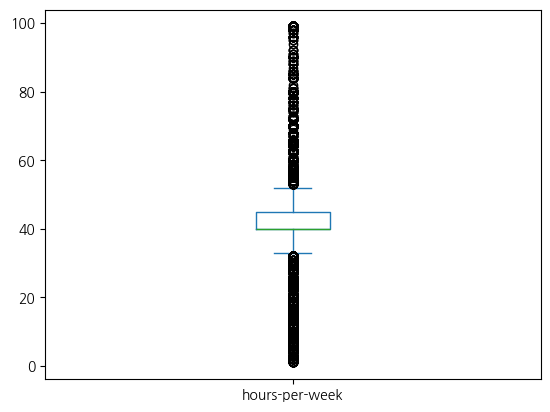

In [49]:
data['hours-per-week'].plot(kind='box')

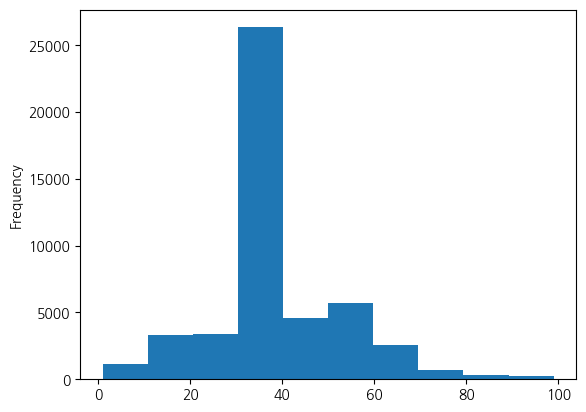

In [50]:
# 구간으로 나누어 확인하면 좋을 거 같음
data['hours-per-week'].plot(kind='hist')
hours_desc = data['hours-per-week'].describe()

# 3.EDA
- 탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로 생성, 문자->숫자, 상관관계 확인

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48264 entries, 0 to 48263
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48264 non-null  int64 
 1   workclass       48264 non-null  object
 2   education       48264 non-null  object
 3   education-num   48264 non-null  int64 
 4   marital-status  48264 non-null  object
 5   occupation      48264 non-null  object
 6   relationship    48264 non-null  object
 7   race            48264 non-null  object
 8   sex             48264 non-null  object
 9   capital-gain    48264 non-null  int64 
 10  capital-loss    48264 non-null  int64 
 11  hours-per-week  48264 non-null  int64 
 12  native-country  48264 non-null  object
 13  class           48264 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


### age : 나이(문자형)

In [52]:
# age 확인
# data['age'].unique()
print(data['age'].value_counts())

# 막대그래프
# data['age'].value_counts().plot(kind='bar')

age
36    1338
35    1331
23    1325
33    1320
31    1315
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [53]:
data['age'].max()

np.int64(90)

In [54]:
# under10s가 없는 것으로 나타나 삭제함
data['age'] = pd.cut(data['age'],
      bins = [10,20,30,40,50,60,70,80,90,100],
      labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'],
      right=False)

In [57]:
data['age'].unique()

['20s', '30s', '40s', '10s', '60s', '50s', '70s', '80s', '90s']
Categories (9, object): ['10s' < '20s' < '30s' < '40s' ... '60s' < '70s' < '80s' < '90s']

### workclass : 고용형태(문자형)

workclass
Private             36333
Self-emp-not-inc     3791
Local-gov            3106
State-gov            1963
Self-emp-inc         1623
Federal-gov          1417
Without-pay            21
Never-worked           10
Name: count, dtype: int64


<Axes: xlabel='workclass'>

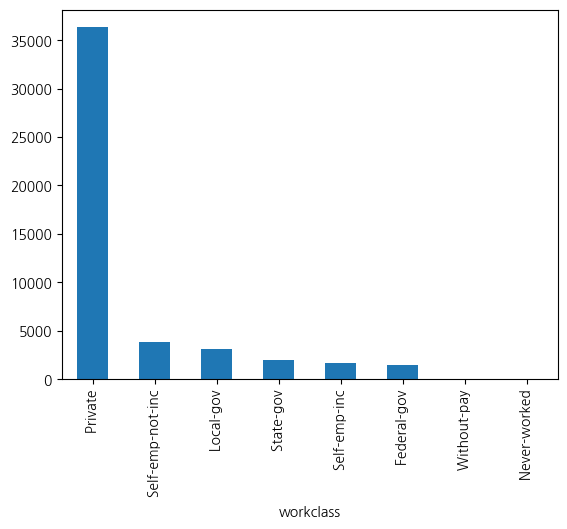

In [58]:
# workclass 확인
print(data['workclass'].value_counts())

# 막대그래프
data['workclass'].value_counts().plot(kind='bar')

### education : 학력(문자형)

In [59]:
# education 확인
print(data['education'].value_counts())

education
HS-grad         15669
Some-college    10783
Bachelors        7898
Masters          2601
Assoc-voc        2043
11th             1801
Assoc-acdm       1585
10th             1376
7th-8th           950
Prof-school       756
9th               753
12th              657
Doctorate         558
5th-6th           506
1st-4th           246
Preschool          82
Name: count, dtype: int64


### education-num : 교육연수(숫자형)

education-num
9     15669
10    10783
13     7898
14     2601
11     2043
7      1801
12     1585
6      1376
4       950
15      756
5       753
8       657
16      558
3       506
2       246
1        82
Name: count, dtype: int64


<Axes: xlabel='education-num'>

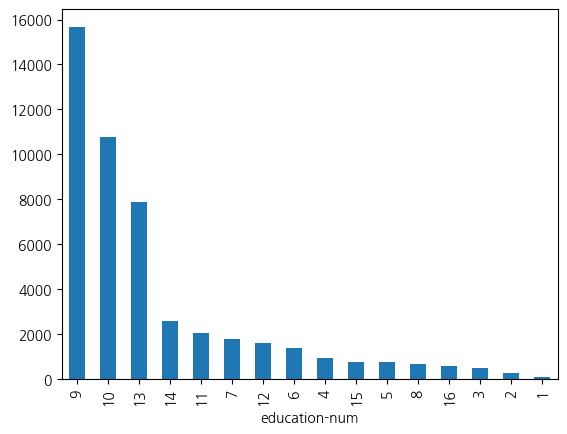

In [60]:
# education-num 확인
# data['education-num'].unique()
# education을 numeric으로 변환한것
print(data['education-num'].value_counts())

# 막대그래프
data['education-num'].value_counts().plot(kind='bar')

### marital-status : 결혼여부(문자형)

marital-status
Married-civ-spouse       22080
Never-married            16001
Divorced                  6521
Separated                 1509
Widowed                   1495
Married-spouse-absent      623
Married-AF-spouse           35
Name: count, dtype: int64


<Axes: xlabel='marital-status'>

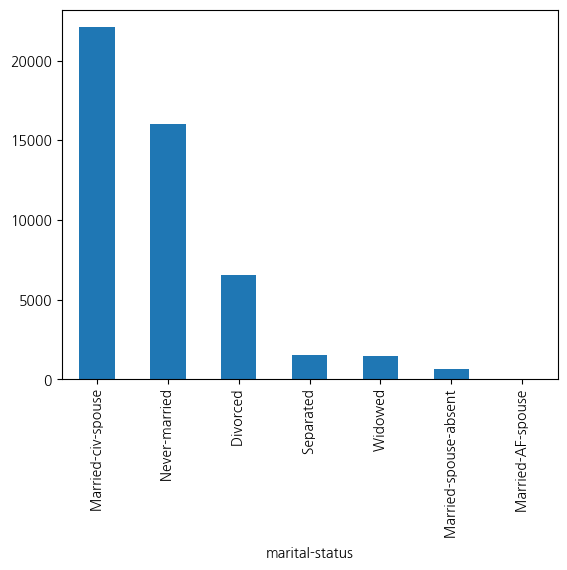

In [61]:
# marital-status 확인
print(data['marital-status'].value_counts())

# 막대그래프
data['marital-status'].value_counts().plot(kind='bar')

### occupation : 직업(문자형)

occupation
Prof-specialty       8798
Craft-repair         6056
Exec-managerial      5944
Adm-clerical         5567
Sales                5433
Other-service        4903
Machine-op-inspct    3015
Transport-moving     2343
Handlers-cleaners    2063
Farming-fishing      1480
Tech-support         1431
Protective-serv       975
Priv-house-serv       241
Armed-Forces           15
Name: count, dtype: int64


<Axes: xlabel='occupation'>

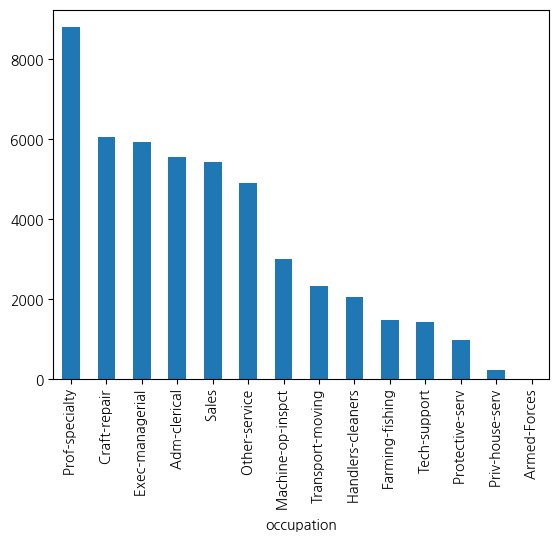

In [62]:
# occupation 확인
print(data['occupation'].value_counts())

# 막대그래프
data['occupation'].value_counts().plot(kind='bar')

### race : 인종(문자형)


race
White                 41248
Black                  4652
Asian-Pac-Islander     1495
Amer-Indian-Eskimo      468
Other                   401
Name: count, dtype: int64


<Axes: xlabel='race'>

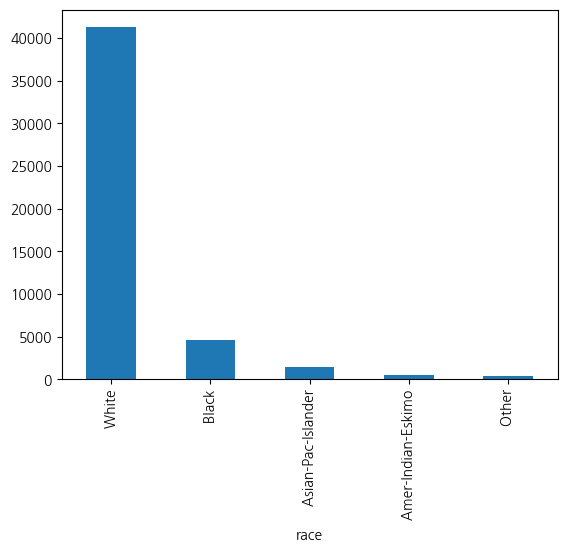

In [63]:
# race 확인
print(data['race'].value_counts())

# 막대그래프
data['race'].value_counts().plot(kind='bar')

### capital-gain : 자산증가(숫자형)

capital-gain
0        44482
15024      513
7688       410
7298       364
3103       152
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 120, dtype: int64


<Axes: ylabel='Frequency'>

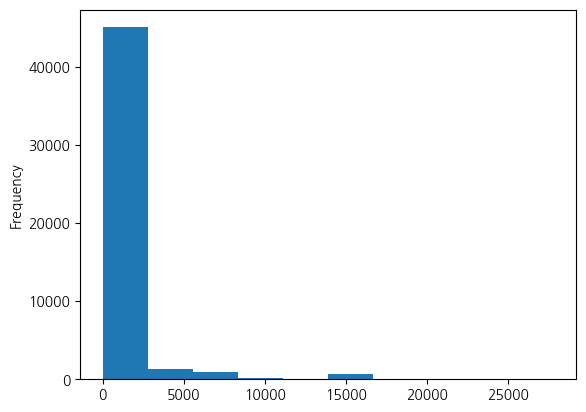

In [64]:
# capital-gain 확인
print(data['capital-gain'].value_counts())

# 히스토그램
data['capital-gain'].plot(kind='hist')

### capital-loss : 자산감소(숫자형)

capital-loss
0       46307
1902      304
1977      253
1887      233
2415       72
        ...  
1911        1
1870        1
1539        1
2080        1
2201        1
Name: count, Length: 61, dtype: int64


<Axes: ylabel='Frequency'>

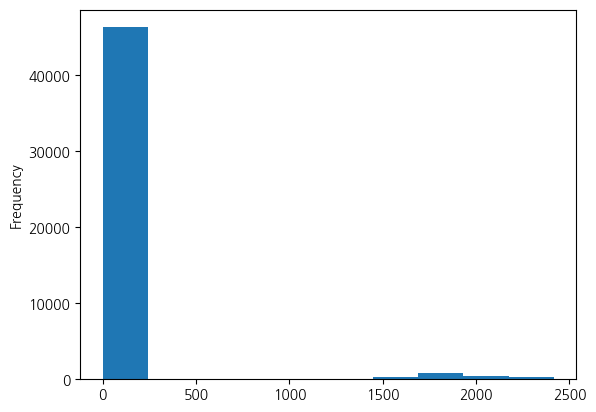

In [65]:
# capital-gain 확인
print(data['capital-loss'].value_counts())

# 히스토그램
data['capital-loss'].plot(kind='hist')

### hours-per-week : 주당 일하는 시간(문자형)

hours-per-week
40    22559
50     4166
45     2689
60     2121
35     1920
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


<Axes: xlabel='hours-per-week'>

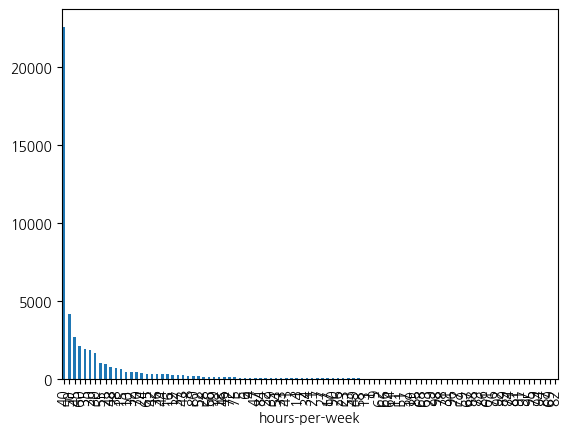

In [66]:
# hours-per-week 확인
# data['hours-per-week'].unique()
print(data['hours-per-week'].value_counts())

# 막대그래프
data['hours-per-week'].value_counts().plot(kind='bar')

In [67]:
# 범위를 지정
data['hours-per-week'].max()

np.int64(99)

In [68]:
data['hours-per-week'] = pd.cut(data['hours-per-week'],
      bins = [0,20,40,60,80,100],
      labels = ['to20', 'to40','to60', 'to80', 'to100'],
      right=False)

In [69]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48259,20s,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,to40,United-States,<=50K
48260,40s,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,to60,United-States,>50K
48261,50s,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,to60,United-States,<=50K
48262,20s,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,to40,United-States,<=50K
48263,50s,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,to60,United-States,>50K


### native-country : 본국(문자형)

In [70]:
# native-country 확인
print(data['native-country'].value_counts())

native-country
United-States                 44148
Mexico                          946
Philippines                     290
Germany                         205
Puerto-Rico                     181
Canada                          180
El-Salvador                     155
India                           147
Cuba                            136
England                         126
China                           120
South                           113
Jamaica                         106
Italy                           105
Dominican-Republic              102
Japan                            91
Guatemala                        88
Poland                           87
Vietnam                          85
Columbia                         85
Haiti                            74
Portugal                         67
Taiwan                           64
Iran                             59
Nicaragua                        49
Greece                           48
Peru                             46
Ecuador      

### class: 연봉구분(문자형)
#### target(분석대상)

class
<=50K    36934
>50K     11330
Name: count, dtype: int64


<Axes: ylabel='count'>

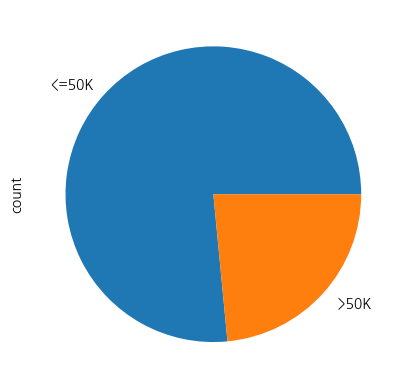

In [71]:
# class 확인
print(data['class'].value_counts())

# 파이차트
data['class'].value_counts().plot(kind='pie')

## 4. Feature Engineering
- 변수 선택, 새로운 특성 생성, 카테고리 변수와 더미 변수화(one-hot encoding)

In [72]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [98]:
# 범위 지정까지는 했음

# 분석 목적 : 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용한 연봉 예측
# 더미 변수화 진행

sample = data[['education-num', 'marital-status', 'occupation', 'capital-gain', 'capital-loss', 'class']].copy()
sample.head()

,education-num,marital-status,occupation,capital-gain,capital-loss,class
0,7,Never-married,Machine-op-inspct,0,0,<=50K
1,9,Married-civ-spouse,Farming-fishing,0,0,<=50K
2,12,Married-civ-spouse,Protective-serv,0,0,>50K
3,10,Married-civ-spouse,Machine-op-inspct,7688,0,>50K
4,10,Never-married,Prof-specialty,0,0,<=50K


In [99]:
sample

,education-num,marital-status,occupation,capital-gain,capital-loss,class
0,7,Never-married,Machine-op-inspct,0,0,<=50K
1,9,Married-civ-spouse,Farming-fishing,0,0,<=50K
2,12,Married-civ-spouse,Protective-serv,0,0,>50K
3,10,Married-civ-spouse,Machine-op-inspct,7688,0,>50K
4,10,Never-married,Prof-specialty,0,0,<=50K
...,...,...,...,...,...,...
48259,12,Married-civ-spouse,Tech-support,0,0,<=50K
48260,9,Married-civ-spouse,Machine-op-inspct,0,0,>50K
48261,9,Widowed,Adm-clerical,0,0,<=50K
48262,9,Never-married,Adm-clerical,0,0,<=50K
